# Performing likelihood ratio test to find out if there is difference in weight when chicken is fed soybean vs. sunflower

## The dataset in “chickwts.txt” has columns as chick **weights** and **feed** type

In [24]:
import numpy
import os
import pandas
import plotnine
from plotnine import *
import scipy
from scipy.optimize import minimize
from scipy.stats import norm
from scipy.stats import chi2
from plotnine import *
os.listdir('.')
os.chdir('/Users/sampathkumarbalaji/EX_12/Intro_Biocom_ND_319_Tutorial12')
chick_weights = pandas.read_csv("chickwts.txt")


### And the dataset with columns being **weight** and **feed** looks like:

In [4]:
print (chick_weights)

    weight       feed
0      179  horsebean
1      160  horsebean
2      136  horsebean
3      227  horsebean
4      217  horsebean
5      168  horsebean
6      108  horsebean
7      124  horsebean
8      143  horsebean
9      140  horsebean
10     309    linseed
11     229    linseed
12     181    linseed
13     141    linseed
14     260    linseed
15     203    linseed
16     148    linseed
17     169    linseed
18     213    linseed
19     257    linseed
20     244    linseed
21     271    linseed
22     243    soybean
23     230    soybean
24     248    soybean
25     327    soybean
26     329    soybean
27     250    soybean
28     193    soybean
29     271    soybean
..     ...        ...
41     226  sunflower
42     320  sunflower
43     295  sunflower
44     334  sunflower
45     322  sunflower
46     297  sunflower
47     318  sunflower
48     325   meatmeal
49     257   meatmeal
50     303   meatmeal
51     315   meatmeal
52     380   meatmeal
53     153   meatmeal
54     263

### The plot looks like:

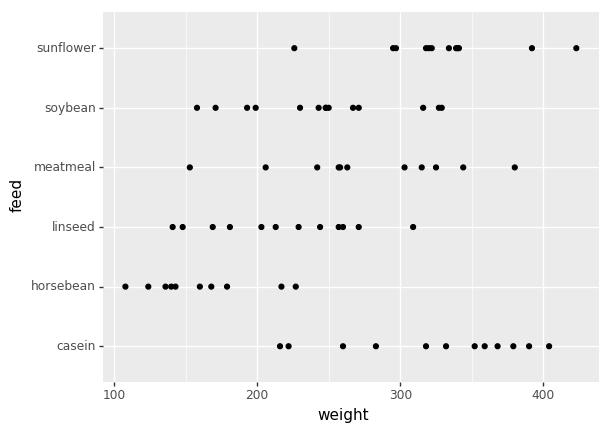

<ggplot: (7539846264)>

In [22]:
ggplot(chick_weights,aes(x="weight",y="feed"))+geom_point(aes(x="weight",y="feed"))

## The question is to find if there is difference in weight of the chicken when they are fed soybean vs. sunflower feed. Null Hypothesis:  *"The weight remains the same (no difference)"*, Alternate hypothesis: *"Yes the weights differ based off the feed type"*.

In [32]:
Sun_Soy_feed_DS = chick_weights.query('feed == "sunflower" or feed == "soybean"')
Sun_Soy_feed_DS['x'] = [0 if feedtype == 'sunflower' else 1 for feedtype in Sun_Soy_feed_DS.feed]


/Users/sampathkumarbalaji/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Defining the null and alternate hypotheses functions

In [25]:
def null_hyp(p,obs):
    B0=p[0]
    sigma=p[1]
    
    expected=B0
    nll= -1*norm(expected,sigma).logpdf(obs.weight).sum()
    return nll

def alt_hyp(p,obs):
    B0=p[0]
    B1=p[1]
    sigma=p[2]
    
    expected=B0+B1*obs.x
    nll=-1*norm(expected,sigma).logpdf(obs.weight).sum()
    return nll


In [27]:
initialGuess_null_hyp=numpy.array([1,1])
initialGuess_alt_hyp=numpy.array([1,1,1])


## Minimize functions for null and alt hyp

In [28]:
fitnull=minimize(null_hyp,initialGuess_null_hyp,method="Nelder-Mead",options={'disp': True},args=Sun_Soy_feed_DS)
fitalt=minimize(alt_hyp,initialGuess_alt_hyp,method="Nelder-Mead",options={'disp': True},args=Sun_Soy_feed_DS)

Optimization terminated successfully.
         Current function value: 145.240592
         Iterations: 85
         Function evaluations: 162
Optimization terminated successfully.
         Current function value: 138.469162
         Iterations: 200
         Function evaluations: 363


## Chi squared calculations and finding the p-value:

In [29]:
1-scipy.stats.chi2.cdf(x=-2*(fitalt.fun-fitnull.fun),df=1)

0.00023317672869549444

Since the p-value is small (< 0.05), it means that the null hypothesis of there is no difference in weight gained based off the feedtype can be rejected.